In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set_style("whitegrid")

def generate_default_plot_env():
    sns.set(font_scale=1.4, style="whitegrid")
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rc('font', family='sans-serif') 
    matplotlib.rc('font', serif='Helvetica Neue') 
    matplotlib.rc('text', usetex='false') 
    matplotlib.rcParams.update({'font.size': 22})
    
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rc('font', family='sans-serif') 
    plt.rc('font', serif='Helvetica Neue') 
    plt.rc('text', usetex='false') 
    plt.rcParams.update({'font.size': 22})

# pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

global_min_steps = 500
global_max_steps = 50000
global_min_points = 10

In [2]:
generate_default_plot_env()

In [3]:
walkscore_moves_df = pd.read_csv('../data/steps_vs_binned_ws_season_hue.csv')

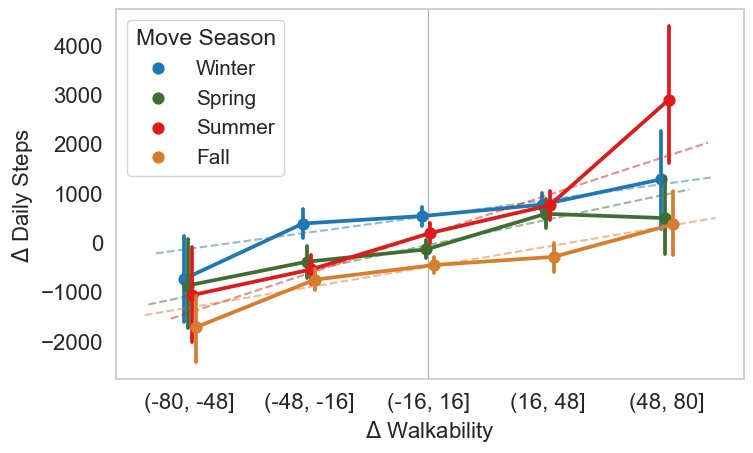

In [6]:
sns.despine(left=True)
season_names = ['Winter', 'Spring', 'Summer', 'Fall']
colors = ['#1f78b4', '#3f6d32', '#de1b1b', '#d77e2d']
g = sns.pointplot(y='steps_diff', x='ws_diff_bin', 
                  data=walkscore_moves_df, 
                  hue='Move Season',
                  hue_order=season_names,
                  dodge=0.1,
                  palette=colors)

g.axvline(x=2, color='#b0b0b0', linewidth=0.8, zorder=-1)

for idx, label in enumerate(season_names):
    specific_df = walkscore_moves_df[walkscore_moves_df['Move Season'] == label]
    sns.regplot(x=2.5 + (specific_df['ws_diff'] - 16)/32, y=specific_df['steps_diff'], 
                x_bins=range(-2, 2+1, 1), scatter=False, ci=None, ax=g, color='k', 
                line_kws={'linestyle': '--', 'linewidth': 1.5, 'color': colors[idx], 'alpha': 0.5})

plt.setp(g.get_xticklabels(), rotation=0)
g.grid(False)

g.set_xlabel('$\Delta$ Walkability')
g.set_ylabel('$\Delta$ Daily Steps')

for item in ([g.title, g.xaxis.label, g.yaxis.label] +
             g.get_xticklabels() + g.get_yticklabels()):
    item.set_fontsize(16)

legend = plt.gca().get_legend()
legend.get_title().set_fontsize('16.5') #legend 'Title' fontsize
plt.setp(legend.get_texts(), fontsize='15') #legend 'list' fontsize

figure = plt.gcf() # get current figure
figure.set_size_inches(8, 5)
plt.tight_layout()
plt.savefig('../output/fig14.pdf', dpi=300)

In [7]:
import statsmodels.formula.api as smf
for idx, label in enumerate(season_names):
    specific_df = walkscore_moves_df[walkscore_moves_df['Move Season'] == label]
    results = smf.ols('steps_diff ~ 1 + ws_diff', data=specific_df).fit()
    print(label, results.pvalues['ws_diff'])

Winter 0.0004039970816154967
Spring 6.410805806123243e-08
Summer 1.0679670699908657e-14
Fall 1.5836333882739672e-07
